<a href="https://colab.research.google.com/github/ShamaySapir/she_codes_data_science_session/blob/master/she_codes_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Who will survive the sinking of the Titanic?**
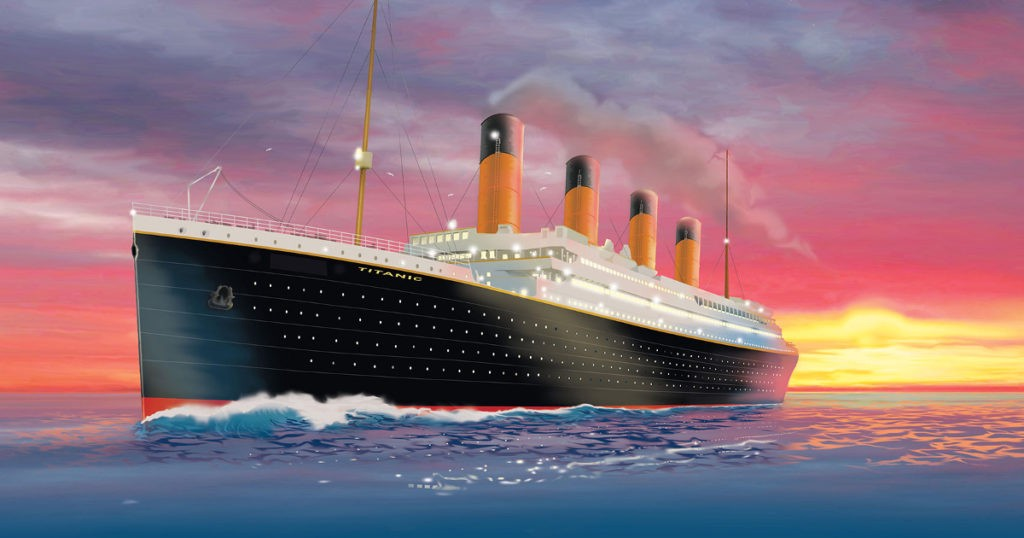

# Connect Google drive - חיבור לגוגל דרייב

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Gets the Data - הבאת הנתונים

In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/titanic.csv"
dataset = pd.read_csv(path)
print(dataset.head())
print(len(dataset))

Clean Data : ניקוי הנתונים


1.   drop empty features - הסרת מאפיינים ריקים
2. drop irrelevant features - הסרת מאפיינים לא רלוונטיים לחיזוי
3.   fill empty features - מילוי מאפיינים ריקים
4. discritization - המרת מאפיין רציף לבדיד
5. convert categorial variables into numeric variables - המרת משתנים קטגוריאליים למשתנים נומריים



In [ ]:
print(dataset.apply(lambda x: sum(x.isnull()), axis=0))

# This method drops features - השיטה הזו מסירה מאפיינים

In [ ]:
def drop_features(data, features_to_drop):
    data.drop(features_to_drop, axis='columns', inplace=True)
    print("features were successfully droped")
    print(data.head())
    return data

features_to_drop = ["Cabin", "PassengerId", "Name", "Ticket", "Fare"]
dataset = drop_features(dataset, features_to_drop)

In [ ]:
print(dataset.apply(lambda x: sum(x.isnull()), axis=0))

In [ ]:
print(dataset.dtypes)

# This method fill Nan values - השיטה הזו ממלאה מופעים עם ערך ריק

In [ ]:
dataset['Age'].fillna(dataset['Age'].mode()[0], inplace=True)

In [ ]:
print(dataset['Age'].mean())
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

In [ ]:
print(dataset['Embarked'].mode()[0])
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

In [ ]:
print(dataset.apply(lambda x: sum(x.isnull()), axis=0))

# discritization - המרת מאפיין רציף לבדיד

In [ ]:
def discritization(feature, labels):
  feat = dataset[feature]
  min_val = feat.min()
  print("Minimum Value:" + str(min_val))
  max_val = feat.max()
  print("Maximum Value:" + str(max_val))
  partition = (min_val + max_val)/len(labels)
  print(partition)
  bins = [min_val] + [min_val+partition] + [min_val + (2*partition)] + [max_val]
  dataset[feature] = pd.cut(feat, bins=bins, labels=labels, include_lowest=True)
  print(dataset.head())
  print(pd.value_counts(dataset[feature], sort=False))

discritization("Age", ['Younge', 'Mature', 'Old'])

In [ ]:
print(dataset.dtypes)

  # convert categorial variables into numeric values - החלפת משתנים קטגוריים למשתנים נומריים


In [ ]:
from sklearn.preprocessing import LabelEncoder

def to_numeric(data):
    label_encoder = LabelEncoder()
    discret_vec = ["Sex", "Age", "Embarked"]
    for category in discret_vec:
        data[category] = label_encoder.fit_transform(data[category])
    print(data)
    return data
  
dataset = to_numeric(dataset)

In [ ]:
print(pd.value_counts(dataset["Sex"], sort=False))
print(pd.value_counts(dataset["Age"], sort=False))
print(pd.value_counts(dataset["Embarked"], sort=False))

# Machine Learning Model preperation - הכנה למודל למידת מכונה

# Split the Features and Goal variable - פיצול בין המאפיינים למשתנה המטרה

In [ ]:
data_x = dataset.loc[:, dataset.columns != 'Survived']
data_y = dataset["Survived"]
print(data_x.head())
print(data_y.head())

# Splits the dataset to train and test - פיצול סט המידע לאימון ובדיקה

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)
print(len(X_train))
print(len(X_test))

# **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

model = RandomForestClassifier()
model.fit(X_train, y_train)
model_prediction = model.predict(X_test)
model_prediction_proba = model.predict_proba(X_test)
accuracy = accuracy_score(y_test, model_prediction)
print(accuracy)

AUC Curve:
המדד ליכולת של המודל להבחין בין הסיווגים (במקרה שלנו - שרד/לא שרד)
ככל שהערך גבוה יותר, כך ביצועי המודל להבחין בין הסיווגים טוב יותר

In [ ]:
import matplotlib.pyplot as plt 

y_probas = model_prediction_proba[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_probas)
auc = roc_auc_score(y_test, y_probas)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()